<a href="https://colab.research.google.com/github/Willlee0225/nbviewer/blob/master/Functional_API_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 讀入所需套件

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%tensorflow_version 2.x

In [0]:
# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Flatten
# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam


In [0]:
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate, add

## 利用Function API預測手寫數字0~9的模型
### 讀入資料

In [0]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

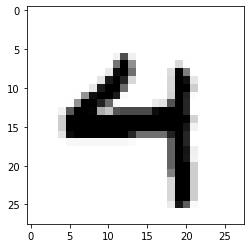

In [121]:
n=990
plt.imshow(x_train[n],cmap="Greys")

In [0]:
# reshape
x_train = x_train.reshape(60000,28,28,1)/255
x_test = x_test.reshape(10000,28,28,1) /255

In [0]:
# Normalization
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [0]:
# one hot encodeing
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [125]:
x_train.shape

(60000, 28, 28, 1)

In [126]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## 建立模型

## 模型先從CNN出去，後來分支出去f1, 再分支成f2,f4，合併成f3，最後在合併到f5

In [0]:
CNN = Sequential()
CNN.add(Conv2D(16, (3,3),padding="same",
                 input_shape=(28,28,1),
                 activation="relu"))
CNN.add(MaxPooling2D(pool_size=(2,2)))
CNN.add(Flatten())

In [0]:
f_1=Dense(600, activation='sigmoid')
f_2=Dense(300, activation='sigmoid')
f_3=Dense(700, activation='sigmoid')
f_4=Dense(400, activation='relu')
f_5=Dense(10, activation='softmax')

In [0]:
x = Input(shape=(28,28,1))

In [0]:
cnn_y1 = CNN(x)

### 修改項目:
### 將h1修改為600維向量
### 分歧處的h2、h3的維度並非承接h1的維度，而是兩者的總和等於700維

In [0]:
h_1 = f_1(cnn_y1)
h_2 = f_2(h_1)
h_3 = f_4(h_1)
h_4 = concatenate([h_2, h_3])
y = f_5(h_4)


In [132]:
split_model = Model(x, y)
split_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
sequential_4 (Sequential)       (None, 3136)         160         input_6[0][0]                    
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 600)          1882200     sequential_4[1][0]               
__________________________________________________________________________________________________
dense_26 (Dense)                (None, 300)          180300      dense_25[0][0]                   
____________________________________________________________________________________________

## 訓練模型

In [0]:
split_model.compile(loss='categorical_crossentropy', 
                optimizer=Adam(),
                metrics=['categorical_accuracy'])

In [134]:
split_model.fit(x_train,y_train,batch_size=64,epochs=5)

Epoch 1/5
938/938 [==============================] - 7s 7ms/step - loss: 0.2469 - categorical_accuracy: 0.9241
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0727 - categorical_accuracy: 0.9772
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0469 - categorical_accuracy: 0.9852
Epoch 4/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0354 - categorical_accuracy: 0.9890
Epoch 5/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0254 - categorical_accuracy: 0.9918


In [135]:
score = split_model.evaluate(x_train, y_train, batch_size=10000)
print(f'Loss: {score[0]}')
print(f'準確率: {score[1]*100}')

6/6 [==============================] - 0s 73ms/step - loss: 0.0180 - categorical_accuracy: 0.9938
Loss: 0.017969168722629547
準確率: 99.38499927520752


In [0]:
result = split_model.predict(x_test)
result=np.argmax(result,axis=1)

In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [138]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
def APImodel_predict(n):
    print("神經網路API的預測是：", result[n])
    Y = y_test[n]
    print("神經網路API的真實數字是：", Y)     

In [0]:
from ipywidgets import interact_manual

In [149]:
interact_manual(APImodel_predict, n=(0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.APImodel_predict>

In [150]:
pd.crosstab(y_test, result, rownames=['實際值'], colnames=['預測值'])

預測值,0,1,2,3,4,5,6,7,8,9
實際值,,,,,,,,,,
0,973,0,0,0,2,2,1,1,0,1
1,1,1123,2,2,1,0,2,1,3,0
2,2,1,1013,0,1,0,0,5,9,1
3,0,0,2,998,0,5,0,0,2,3
4,0,0,0,0,964,0,1,0,1,16
5,1,0,0,5,0,882,2,0,0,2
6,5,2,0,0,7,13,927,0,4,0
7,0,0,4,2,0,0,0,1008,5,9
8,5,0,1,1,0,0,0,1,962,4
